
# <font color=orange>GRIP - The Sparks Foundation</font>

# <font color=purple>Data Science and Business Analytics(GRIP May 21)</font>

# <font color=violet>Author : Neha Suryawanshi.</font>

## <font color=green>Task-2 : Prediction using Unsupervised ML.</font>

### <font color=skyblue>Problem Statement : Using given dataset predict the optimum number of clusters & represent it visually.</font>

### Unsupervised ML : Unsupervised machine learning, in contrast to supervised, involves inferring the patterns within datasets without reference to known, or labeled, outcomes.

### K- Means : K-means clustering is a type of unsupervised learning, which is used when you have unlabeled data (i.e., data without defined categories or groups).



### <font color=darkpink>1.IMPORTING REQUIRED LIBRARIES</font>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
import seaborn as sns

### <font color=hotpink>Loading of the iris dataset</font>

In [15]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df   # See the first 5 rows

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [14]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### <font color=darkpink>2.DETERMINING THE OPTIMUM NUMBER OF CLUSTERS USING THE ELBOW()</font>

In [16]:
x = iris_df.iloc[:, [0, 1, 2, 3]].values
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

### <font color=hotpink>Plotting the results onto a line graph</font>

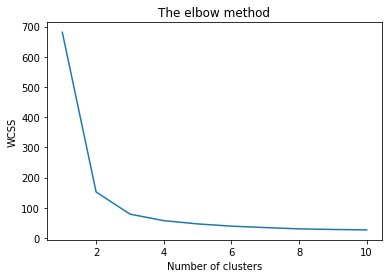

In [17]:
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster Sum of Squares
plt.show()

Optimum number of clusters = 3

### <font color=darkpink>3.CREATING THE KMEANS CLASSIFIER</font>

 ### <font color=hotpink>Applying kmeans to the dataset / Creating the kmeans classifier</font>


In [18]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

### <font color=darkpink>4.PLOTING THE CLUSTERS</font>

### <font color=hotpink>Visualising the clusters</font>

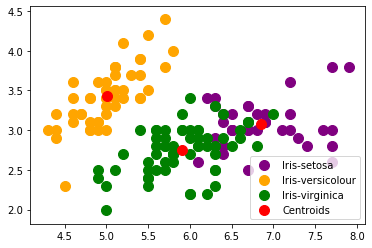

In [19]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

# Plotting th centroids of the clusters 

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')

plt.legend()

### <font color=darkpink>5.LABELING THE PREDICTIONS</font>

considering 0 Corresponds to 'Iris-setosa'

1 to 'Iris-versicolour'

2 to 'Iris-virginica'

In [20]:
y_kmeans = np.where(y_kmeans==0, 'Iris-setosa', y_kmeans)
y_kmeans = np.where(y_kmeans=='1', 'Iris-versicolour', y_kmeans)
y_kmeans = np.where(y_kmeans=='2', 'Iris-virginica', y_kmeans)

### <font color=darkpink>6.ADDING THE PREDICTION TO THE DATASET</font>

In [22]:
data_with_clusters = iris_df.copy()
data_with_clusters["Cluster"] = y_kmeans
data_with_clusters.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Cluster
0,5.1,3.5,1.4,0.2,Iris-versicolour
1,4.9,3.0,1.4,0.2,Iris-versicolour
2,4.7,3.2,1.3,0.2,Iris-versicolour
3,4.6,3.1,1.5,0.2,Iris-versicolour
4,5.0,3.6,1.4,0.2,Iris-versicolour
